# pvlib-Python Forecasting (Albuquerque, NM)
### Install Standard Release 

In [1]:
# pip Upgrade
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1.1)


In [2]:
# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Module siphon was not found
!pip install siphon

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2


# Try to save Excel
!pip install openpyxl

In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
%matplotlib inline

# Specify Location (Albuiquerque, NM)
latitude, longitude, tz = 35, -106.6, 'US/Mountain'

# Specify time range
start = pd.Timestamp(datetime.date.fromordinal(737598), tz=tz)
end = start + pd.Timedelta(days=1)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:19: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


### Create Model

In [4]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Total_cloud_cover_middle_cloud_Mixed_intervals_Average  \
2020-06-22 06:00:00-06:00                                                0.0        
2020-06-22 09:00:00-06:00                                                0.0        
2020-06-22 12:00:00-06:00                                                0.0        
2020-06-22 15:00:00-06:00                                                0.0        
2020-06-22 18:00:00-06:00                                                0.0        

                           Temperature_surface  \
2020-06-22 06:00:00-06:00           293.165710   
2020-06-22 09:00:00-06:00           290.227448   
2020-06-22 12:00:00-06:00           290.600006   
2020-06-22 15:00:00-06:00           306.399994   
2020-06-22 18:00:00-06:00           317.928528   

                           Total_cloud_cover_convective_cloud  \
2020-06-22 06:00:00-06:00                                 0.0   
2020-06-22 09:00:00-06:00                                 

### Process Data with pvlib

In [5]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-22 06:00:00-06:00  20.015717    3.814404    0.249416    0.000000   
2020-06-22 09:00:00-06:00  17.077454    1.221024  270.176115   55.776603   
2020-06-22 12:00:00-06:00  17.450012    4.106597  405.883410   30.343818   
2020-06-22 15:00:00-06:00  33.250000    2.292547  771.141014  471.086465   
2020-06-22 18:00:00-06:00  44.778534    4.539758  345.274019  457.376168   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-22 06:00:00-06:00    0.249416          26.0         0.0         0.0   
2020-06-22 09:00:00-06:00  237.866198          74.0         0.0         0.0   
2020-06-22 12:00:00-06:00  377.170404          87.0         0.0         0.0   
2020-06-22 15:00:00-06:00  350.649226          18.0         0.0         0.0   
2020-06-22 18:00:00-06:00  139.585490          13.0         0.0         0.0   

                           high_clouds  
2020-06-22 06:00:00-06:00  

### GFS'S Class

In [6]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-06-22 06:00:00-06:00  20.015717    3.814404    0.249416    0.000000   
2020-06-22 09:00:00-06:00  17.077454    1.221024  270.176115   55.776603   
2020-06-22 12:00:00-06:00  17.450012    4.106597  405.883410   30.343818   
2020-06-22 15:00:00-06:00  33.250000    2.292547  771.141014  471.086465   
2020-06-22 18:00:00-06:00  44.778534    4.539758  345.274019  457.376168   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-06-22 06:00:00-06:00    0.249416          26.0         0.0         0.0   
2020-06-22 09:00:00-06:00  237.866198          74.0         0.0         0.0   
2020-06-22 12:00:00-06:00  377.170404          87.0         0.0         0.0   
2020-06-22 15:00:00-06:00  350.649226          18.0         0.0         0.0   
2020-06-22 18:00:00-06:00  139.585490          13.0         0.0         0.0   

                           high_clouds  
2020-06-22 06:00:00-06:00  

## Cloud Cover & Radiation

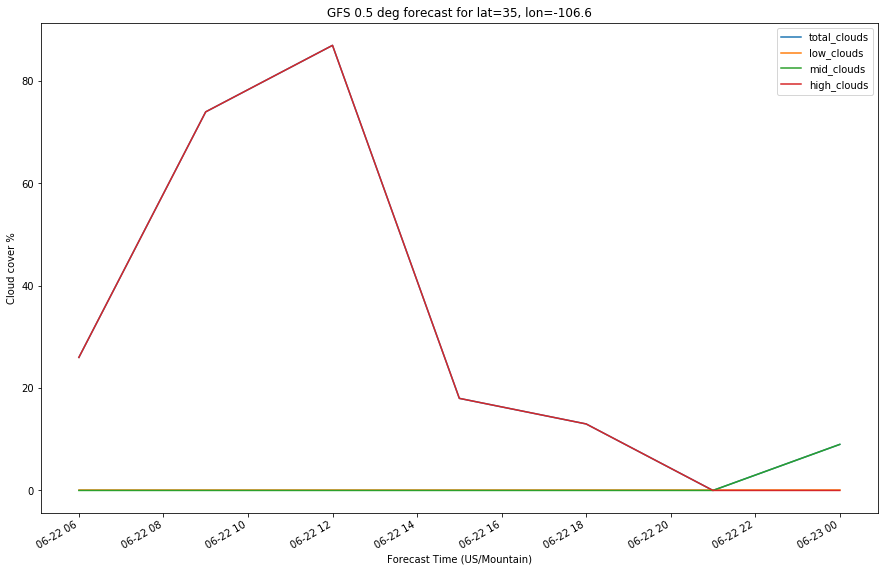

In [7]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

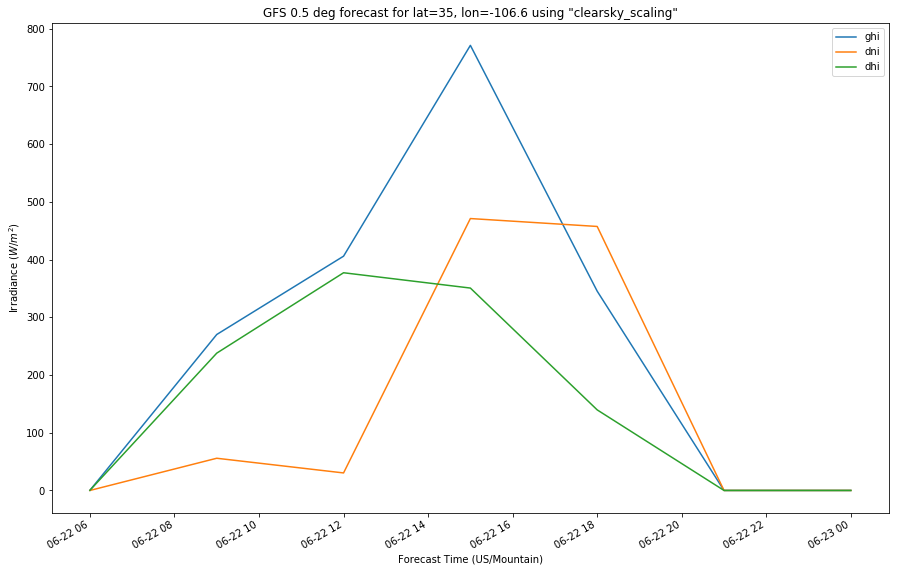

In [8]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

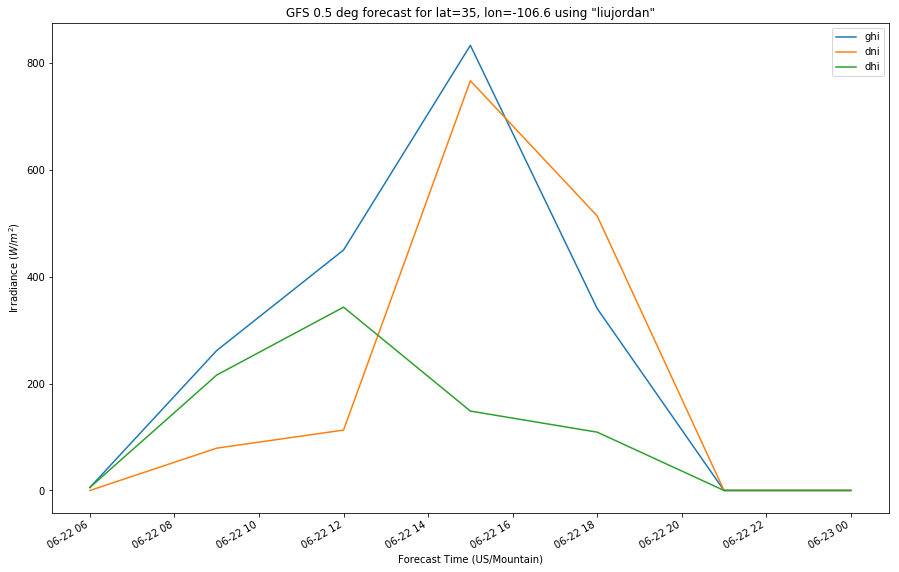

In [9]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

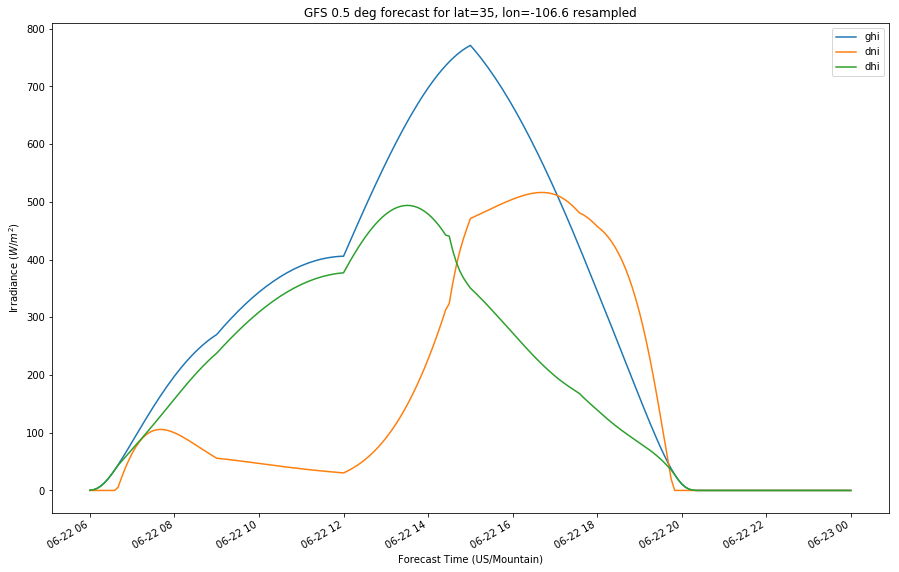

In [10]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

## Weather Models
### GFS
The Global Forecast System is the US model that provides forecast for the entire globe (6hr update)
### HRRR

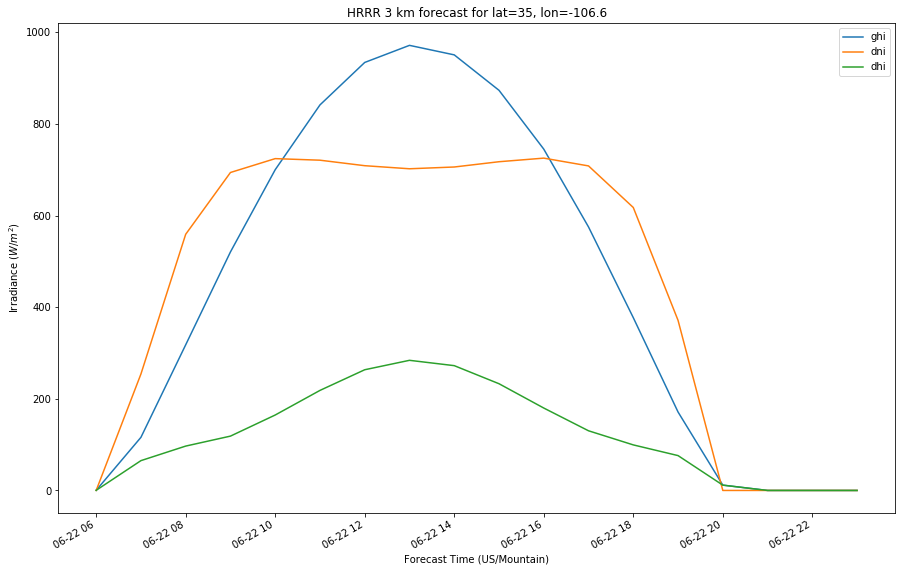

In [11]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [12]:
hrrr_data=data[irrad_vars]
hrrr_data.describe()

,ghi,dni,dhi
count,18.000000,18.000000,18.000000
mean,450.315699,456.051963,122.984845
std,381.447894,317.572294,101.119974
min,0.000000,0.000000,0.000000
25%,37.683627,63.531474,24.976151
50%,448.856575,655.749928,109.002695
75%,817.316152,708.670133,208.733027
max,971.439125,725.304593,284.013544


### RAP

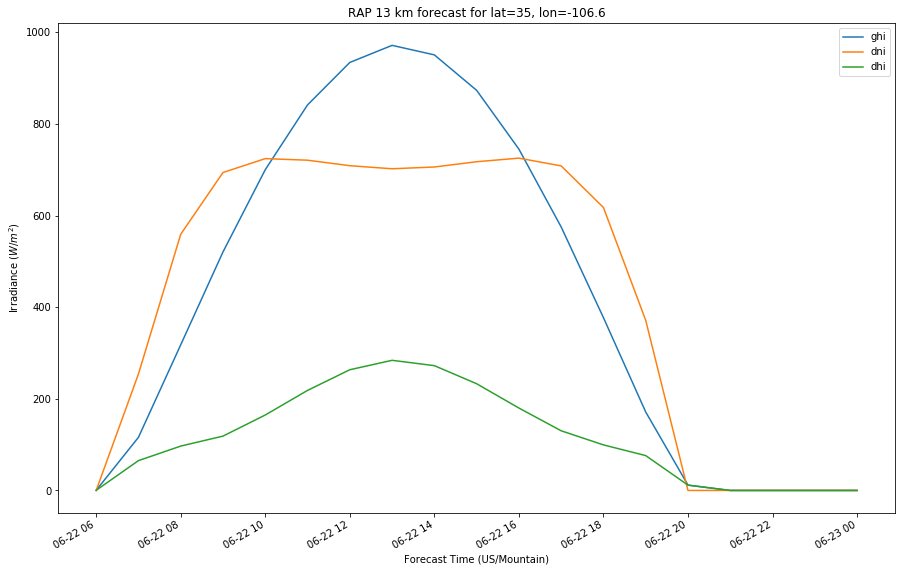

In [13]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

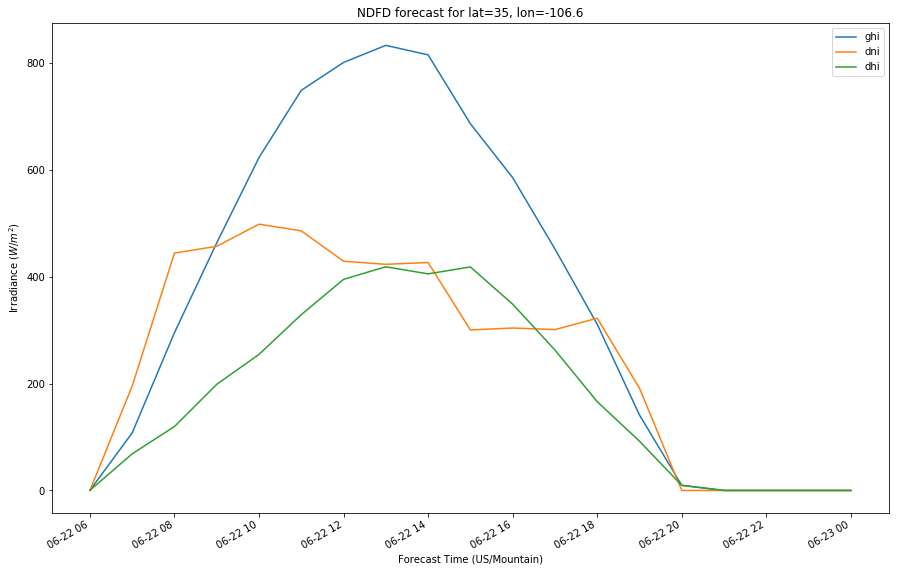

In [14]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

In [15]:
ndfd_data=data[irrad_vars]
ndfd_data.describe()

,ghi,dni,dhi
count,19.000000,19.000000,19.000000
mean,361.557872,251.369229,183.451237
std,325.644340,195.067530,164.702952
min,0.000000,0.000000,0.000000
25%,4.925620,0.000000,4.925620
50%,310.954057,300.849626,166.078729
75%,654.343006,427.535390,338.626651
max,832.523324,498.105933,418.379947


# PV Power Forecast - HRRR

In [16]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = HRRR()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [17]:
invdb = pvsystem.retrieve_sam('CECInverter')
invdb

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.08961,2.24041,1.84651,1.95054,1.76944,1.84378,46.8638,67.7909,62.5547,18.1663,...,36.0334,2.5301,22.0954,24.4658,42.7765,31.682,64.7742,54.5701,85.1457,62.4867
Paco,250,250,300,300,300,300,10000,10000,12000,3000,...,3180,230,1100,2000,2500,3000,3500,4600,4800,5200
Pdco,259.589,259.492,311.669,311.581,312.421,312.005,10488.3,10296,12358.8,3142.3,...,3315.65,245.63,1194.09,2161.88,2632.84,3205.93,3641.84,4797.81,4968.03,5382.86
Vdco,40,40,40,40,45,45,320,362,370,310,...,375,40,182,199,218,222.5,263,254,263,280
C0,-4.1e-05,-3.9e-05,-3.3e-05,-3.4e-05,-4.5e-05,-3.5e-05,-2.7759e-06,-1.38839e-06,-1.009e-06,-8.03949e-06,...,-7.98467e-06,6.2e-05,-2.1e-05,-1.3e-05,-1.4e-05,-8.21046e-06,-9.08073e-06,-5.99928e-06,-6.16035e-06,-4.63524e-06
C1,-9.1e-05,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-3.6e-05,-4.9e-05,-5.6e-05,-1.1e-05,...,-7.5e-05,-9.8e-05,5.7e-05,5.5e-05,6.1e-05,3.6e-05,3.5e-05,2.8e-05,3.4e-05,4.4e-05
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


## ModelChain Attributes

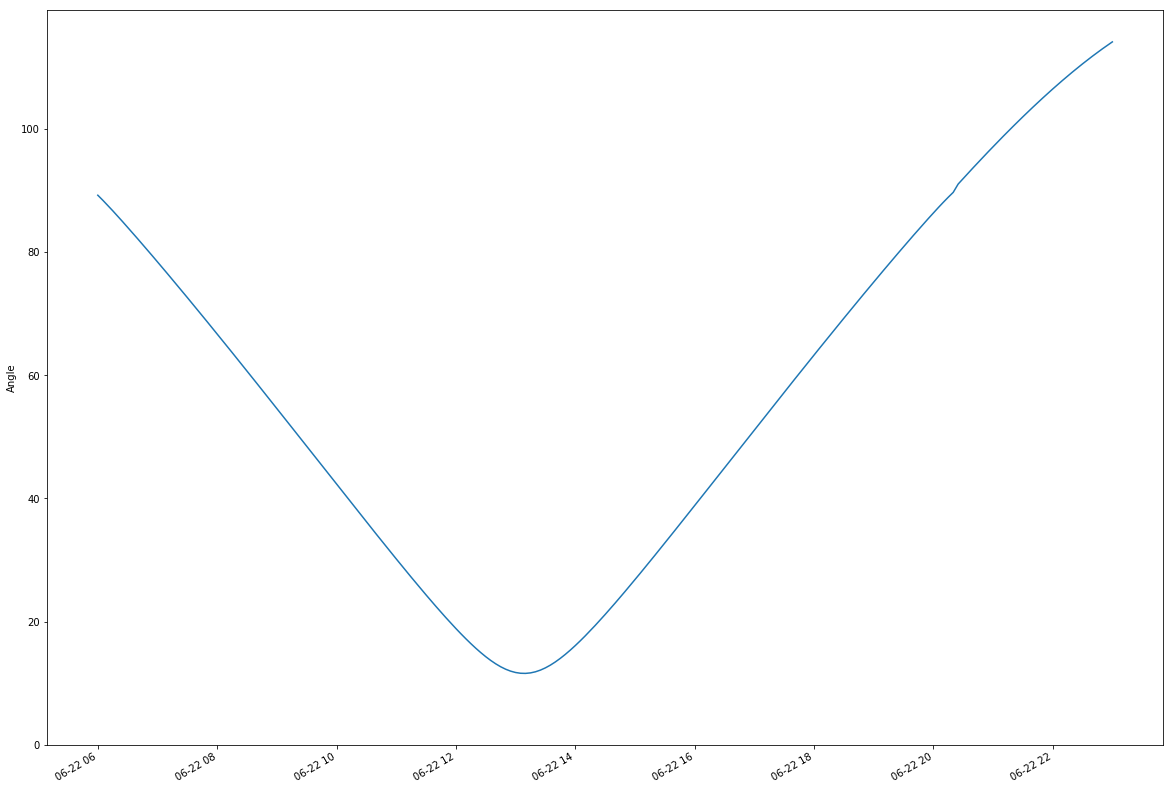

In [18]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

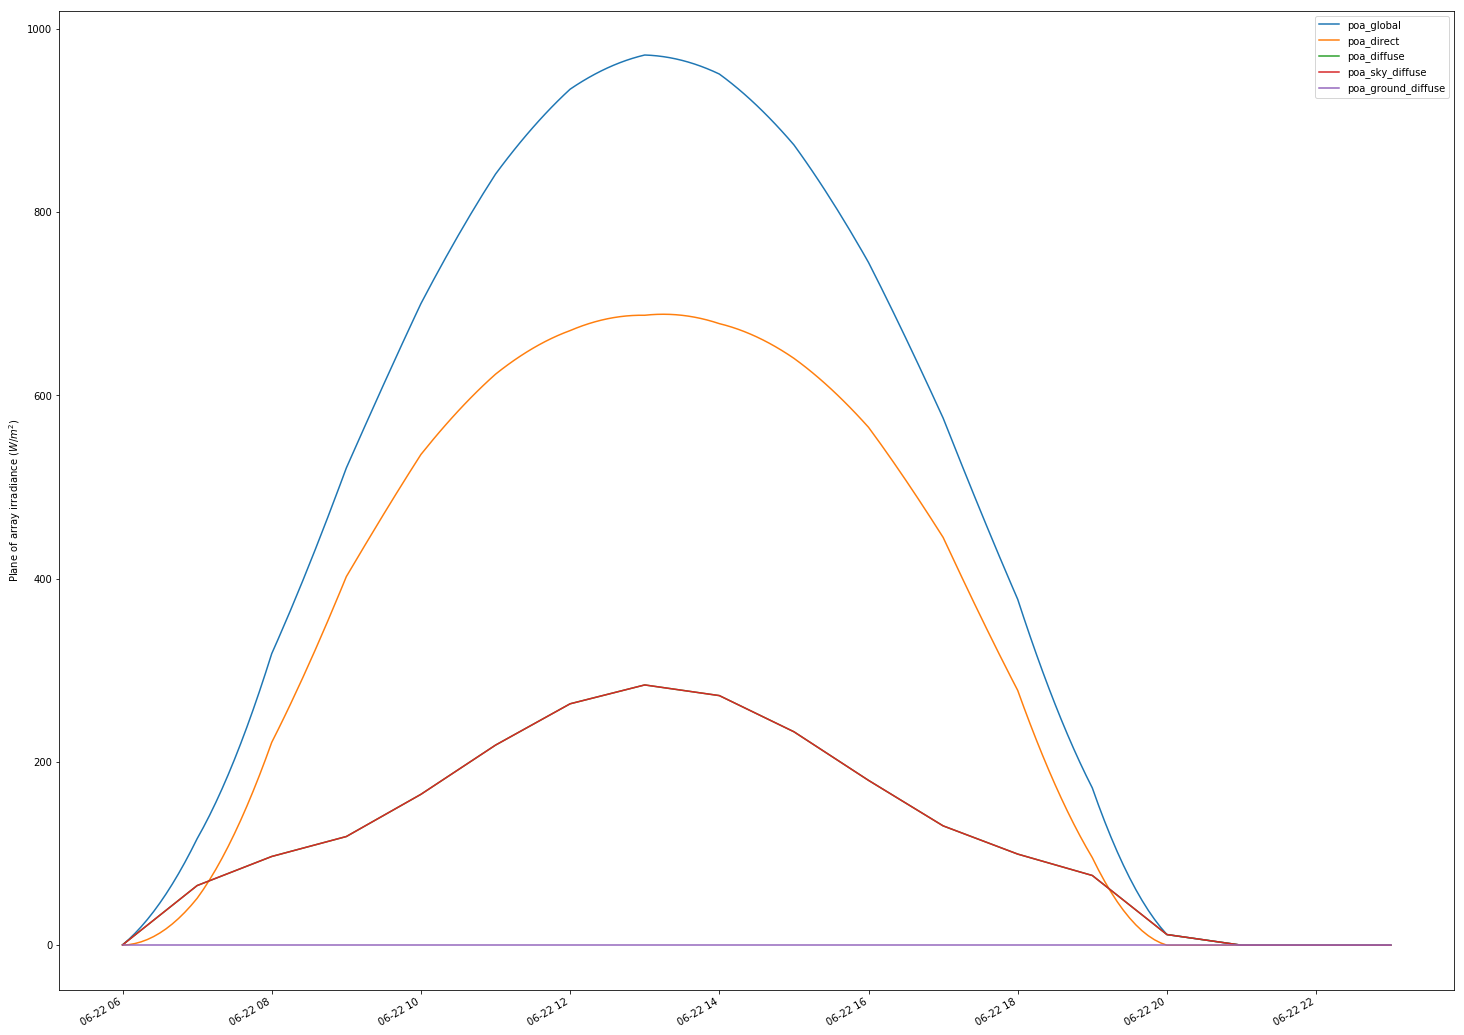

In [19]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

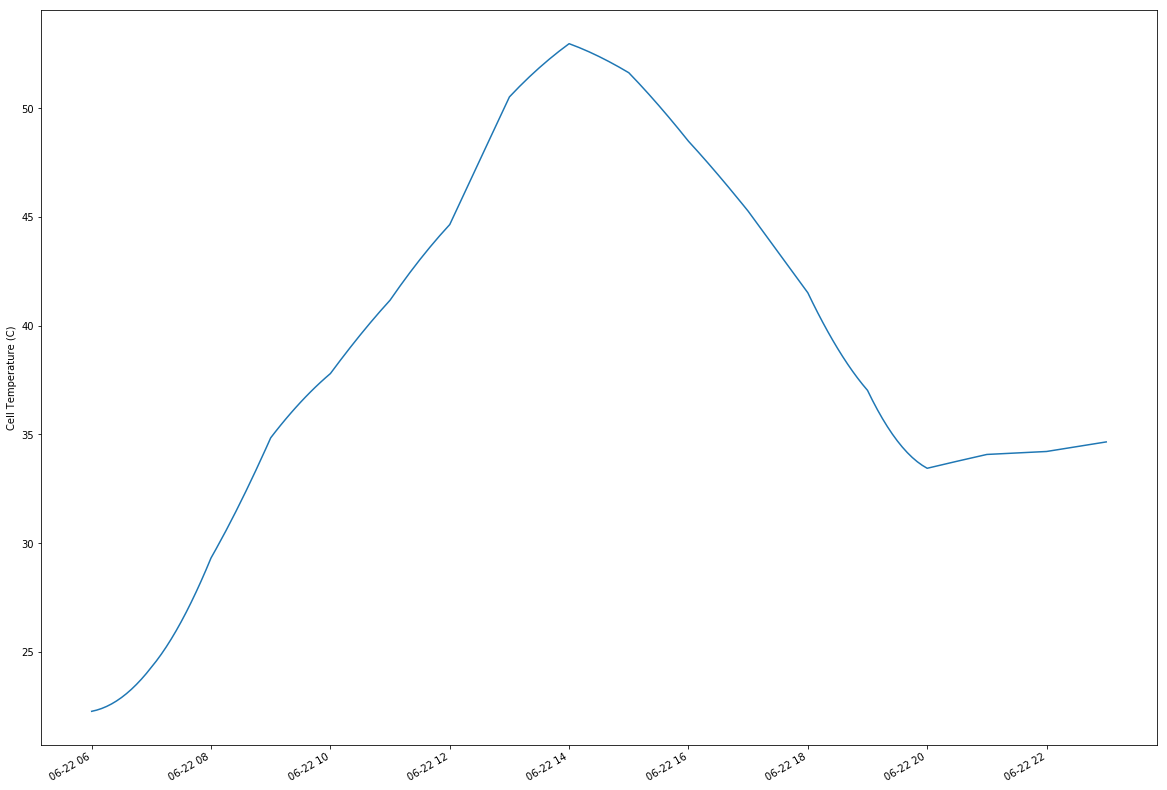

In [20]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

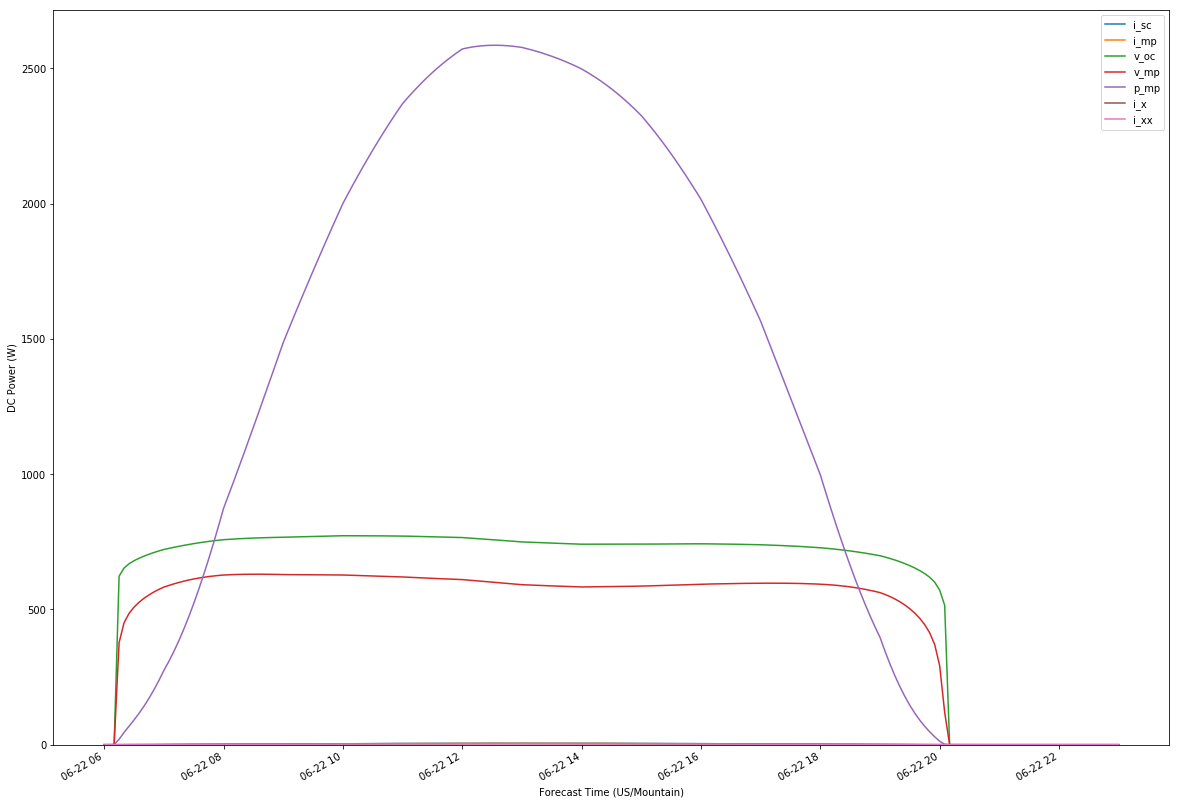

In [21]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [22]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2.387166,2.129549,600.394493,477.278531,1281.084105,2.331084,1.553217
std,1.868754,1.662003,289.270230,234.761787,999.153840,1.825961,1.185579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.321339,0.289795,679.998603,526.371296,145.620173,0.313024,0.230513
50%,2.487783,2.227263,741.290533,590.756256,1376.829494,2.427060,1.682446
75%,4.285753,3.821813,759.264831,612.600658,2303.965800,4.186375,2.751884
max,4.903640,4.357555,772.546232,630.377243,2585.671666,4.791930,3.092781


In [23]:
mc.dc.fillna(0).to_csv('HRRR DC June 22.csv', encoding='utf-8')

## MC AC Power

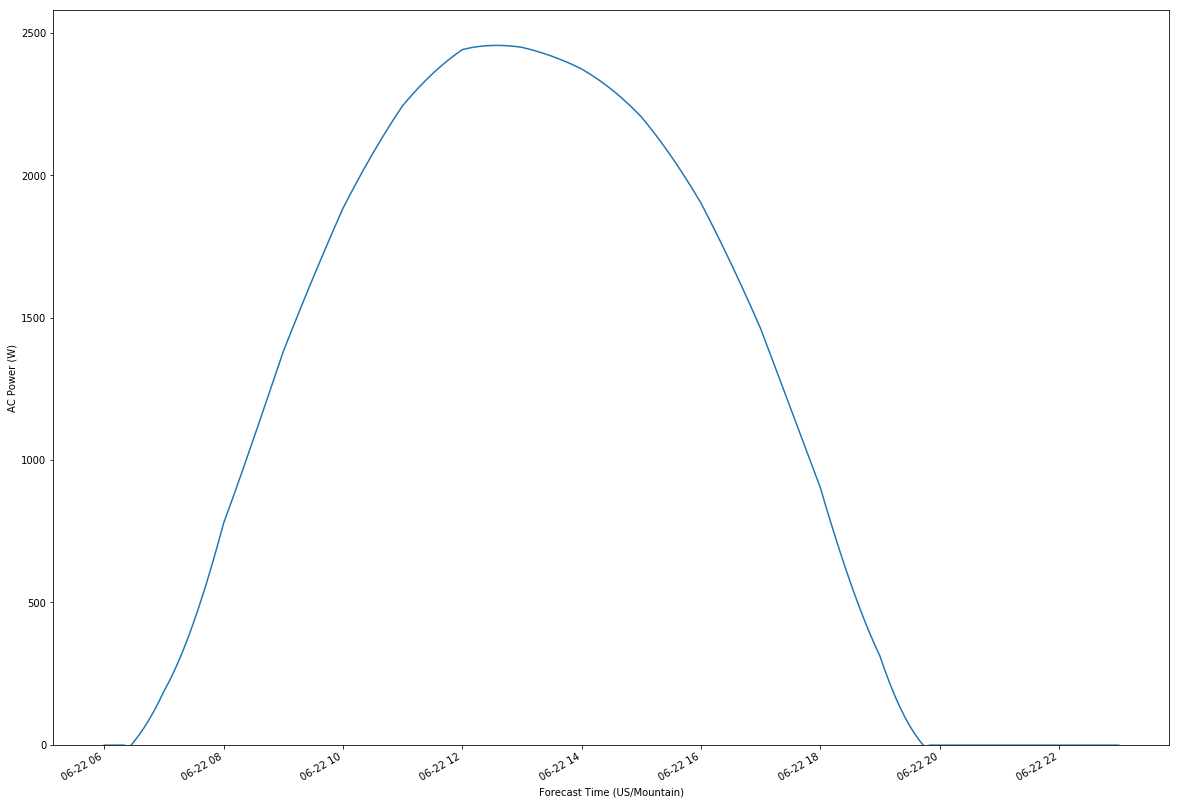

In [24]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [25]:
mc.ac.describe()

count     205.000000
mean     1193.982639
std       960.041825
min       -10.262546
25%        65.450299
50%      1275.675804
75%      2183.615294
max      2455.720507
dtype: float64

In [26]:
mc.ac.fillna(0)

2020-06-22 06:00:00-06:00      -1.560000
2020-06-22 06:05:00-06:00      -1.560000
2020-06-22 06:10:00-06:00      -1.560000
2020-06-22 06:15:00-06:00      -1.560000
2020-06-22 06:20:00-06:00      -1.560000
2020-06-22 06:25:00-06:00     -10.262546
2020-06-22 06:30:00-06:00      10.888002
2020-06-22 06:35:00-06:00      33.823517
2020-06-22 06:40:00-06:00      59.081207
2020-06-22 06:45:00-06:00      86.941192
2020-06-22 06:50:00-06:00     117.545127
2020-06-22 06:55:00-06:00     150.959765
2020-06-22 07:00:00-06:00     187.207384
2020-06-22 07:05:00-06:00     219.812578
2020-06-22 07:10:00-06:00     255.599914
2020-06-22 07:15:00-06:00     294.568166
2020-06-22 07:20:00-06:00     336.687822
2020-06-22 07:25:00-06:00     381.904798
2020-06-22 07:30:00-06:00     430.143857
2020-06-22 07:35:00-06:00     481.311914
2020-06-22 07:40:00-06:00     535.301137
2020-06-22 07:45:00-06:00     591.991843
2020-06-22 07:50:00-06:00     651.255240
2020-06-22 07:55:00-06:00     712.955836
2020-06-22 08:00

In [27]:
mc.ac.fillna(0).to_csv('HRRR AC June 22.csv', encoding='utf-8')

### HRRR Irradiance Data

In [28]:
hrrr_data

,ghi,dni,dhi
2020-06-22 06:00:00-06:00,0.300140,0.000000,0.300140
2020-06-22 07:00:00-06:00,115.904089,254.125897,65.074187
2020-06-22 08:00:00-06:00,317.857482,559.103685,96.818999
2020-06-22 09:00:00-06:00,520.570555,693.949270,118.584024
2020-06-22 10:00:00-06:00,700.049123,724.227239,164.646314
2020-06-22 11:00:00-06:00,841.437849,720.792360,218.352475
2020-06-22 12:00:00-06:00,934.139079,708.790306,263.442333
2020-06-22 13:00:00-06:00,971.439125,702.077287,284.013544
2020-06-22 14:00:00-06:00,950.672548,705.940942,272.383073
2020-06-22 15:00:00-06:00,873.319366,717.455103,232.918927


In [29]:
hrrr_data.to_csv('HRRR June 22.csv', encoding='utf-8')

# PV Power Forecast - NDFD

In [30]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain
from pvlib import pvsystem

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['iPower__SHO_5_2__240V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = pvsystem.PVSystem(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=14, strings_per_inverter=1)

# fx is a common abbreviation for forecast
fx_model = NDFD()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## ModelChain Attributes

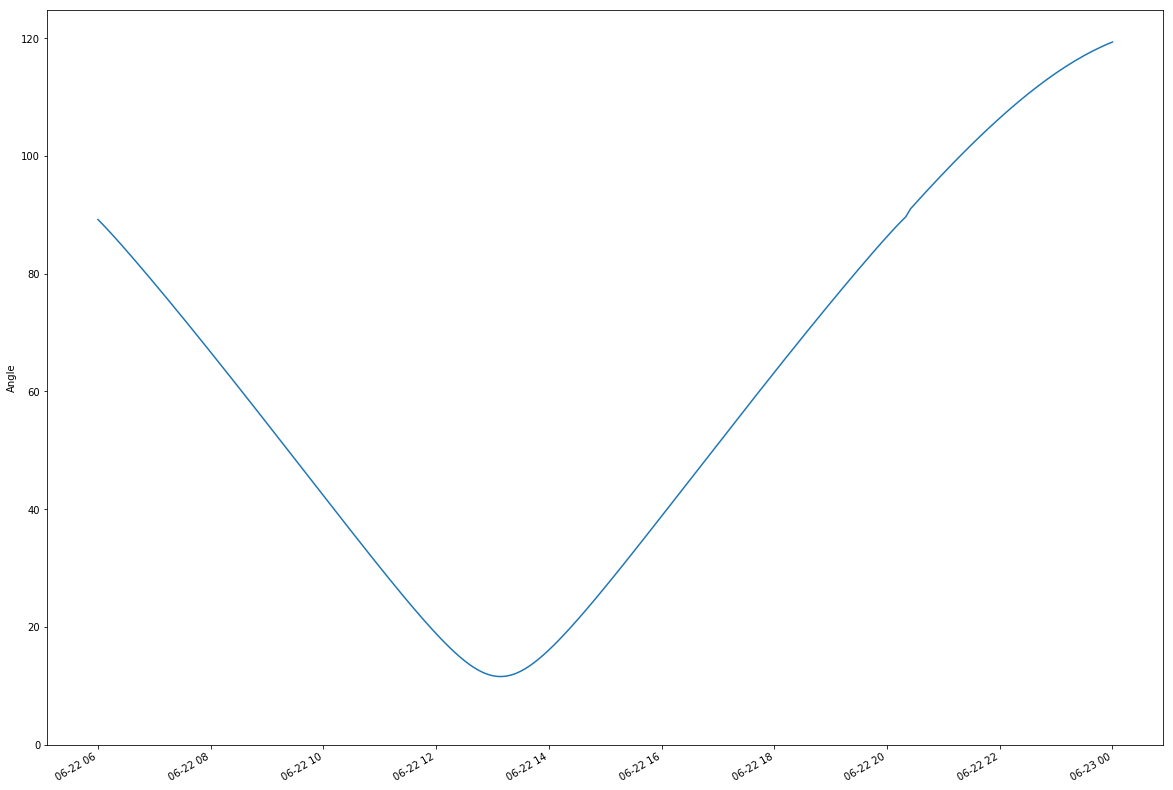

In [31]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

## Modeling intermediates & Forecast power

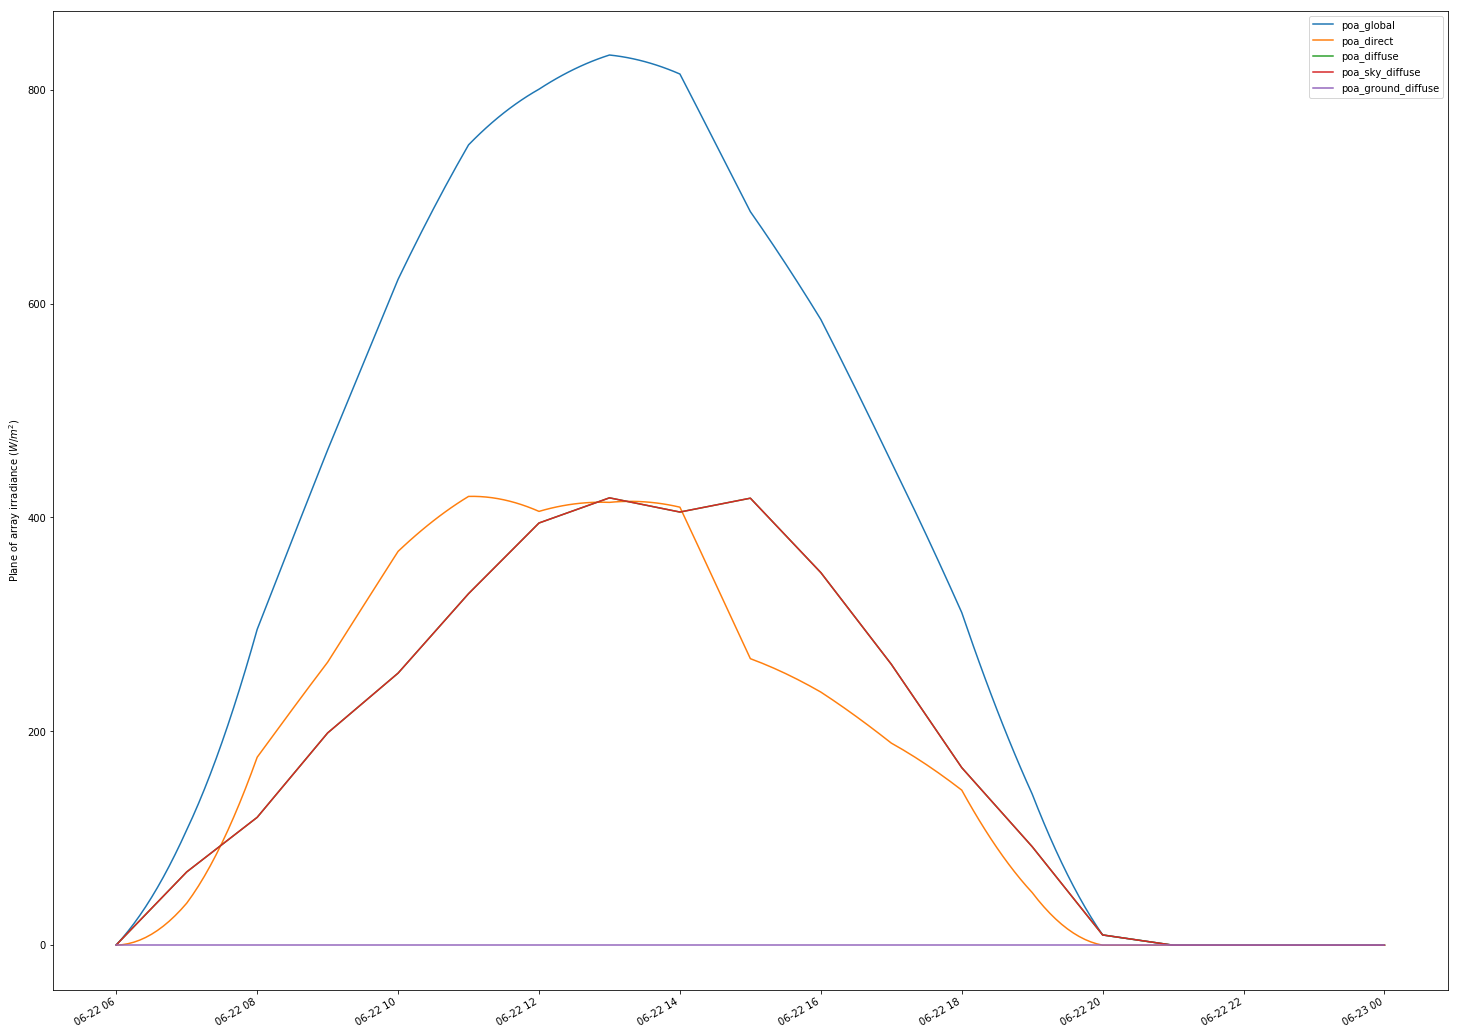

In [32]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

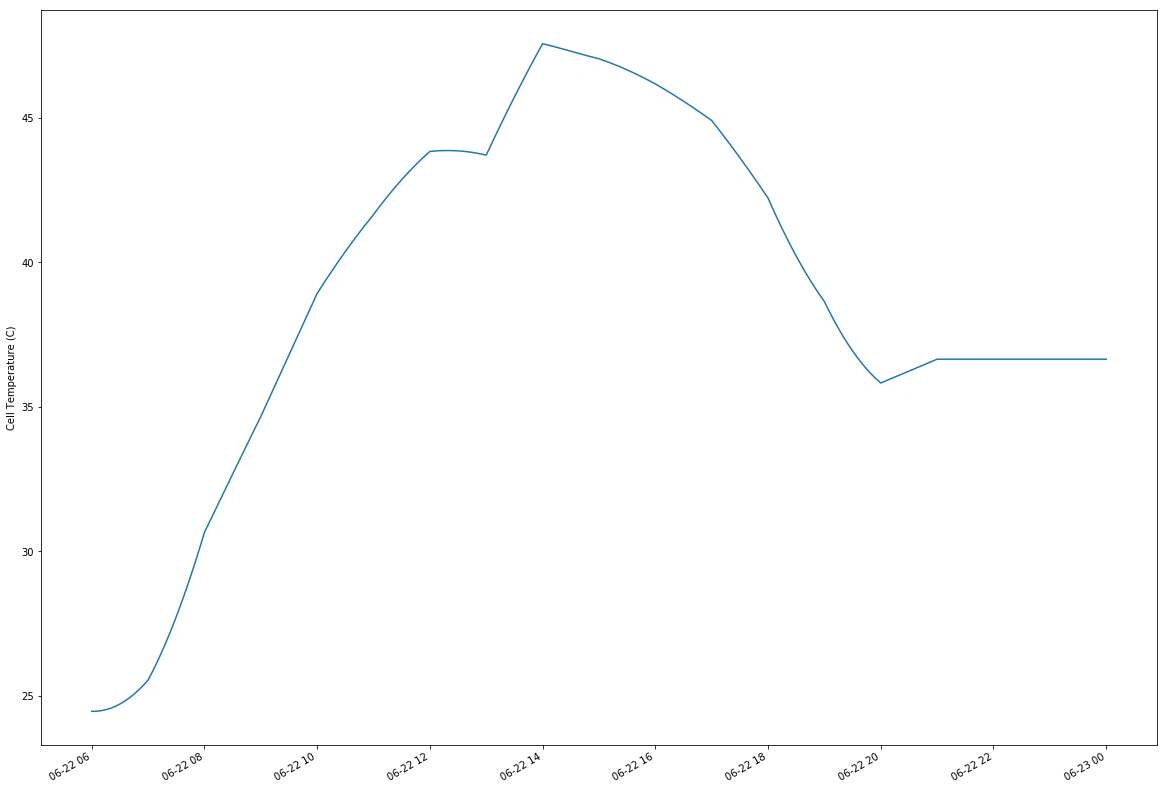

In [33]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

## MC DC Power

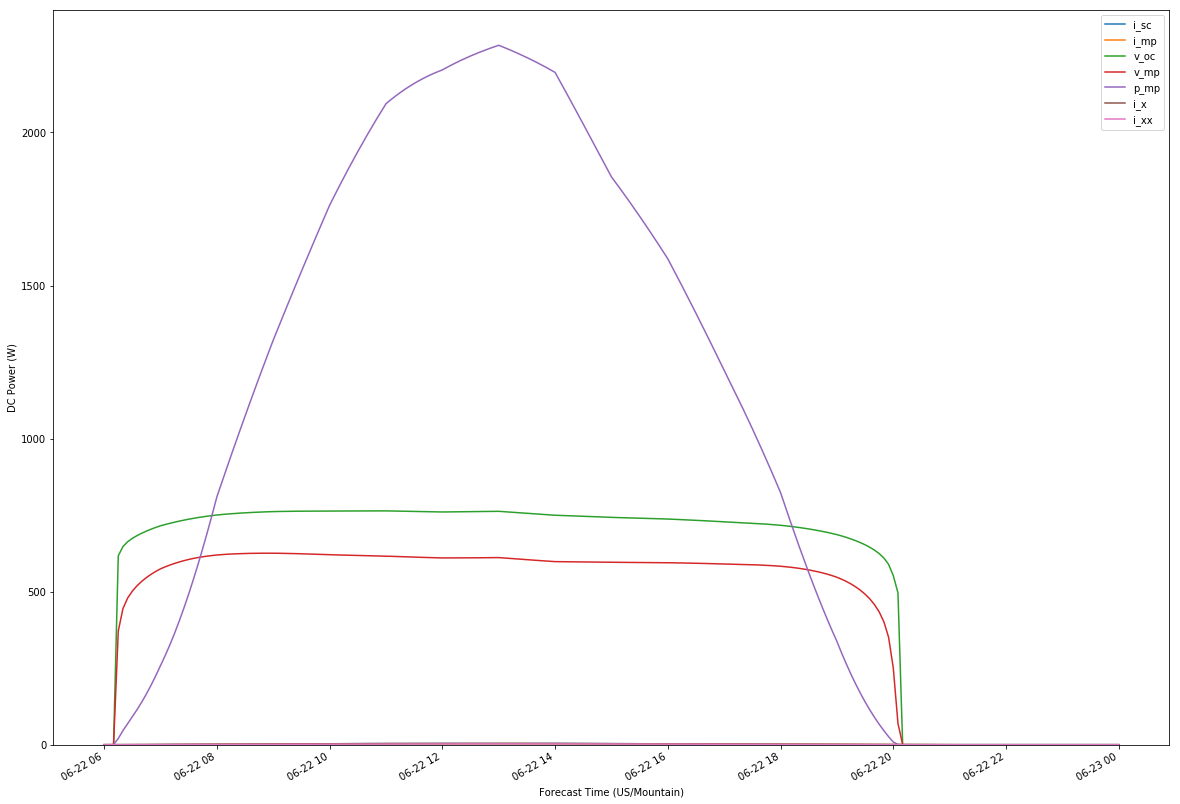

In [34]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [35]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,1.916223,1.712799,563.502218,449.243031,1034.879189,1.870422,1.268694
std,1.594101,1.421653,311.196625,253.086662,867.184814,1.556772,1.034255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.114499,0.103538,617.016880,401.538996,45.869266,0.111520,0.082586
50%,1.912896,1.719050,733.710076,593.428314,1032.299159,1.865471,1.314215
75%,3.488124,3.112884,759.152220,610.794758,1883.689906,3.405336,2.293083
max,4.193227,3.738175,763.863831,625.657361,2284.921026,4.095720,2.700173


In [36]:
mc.dc.fillna(0).to_csv('NDFD DC June 22.csv', encoding='utf-8')

## MC AC Power

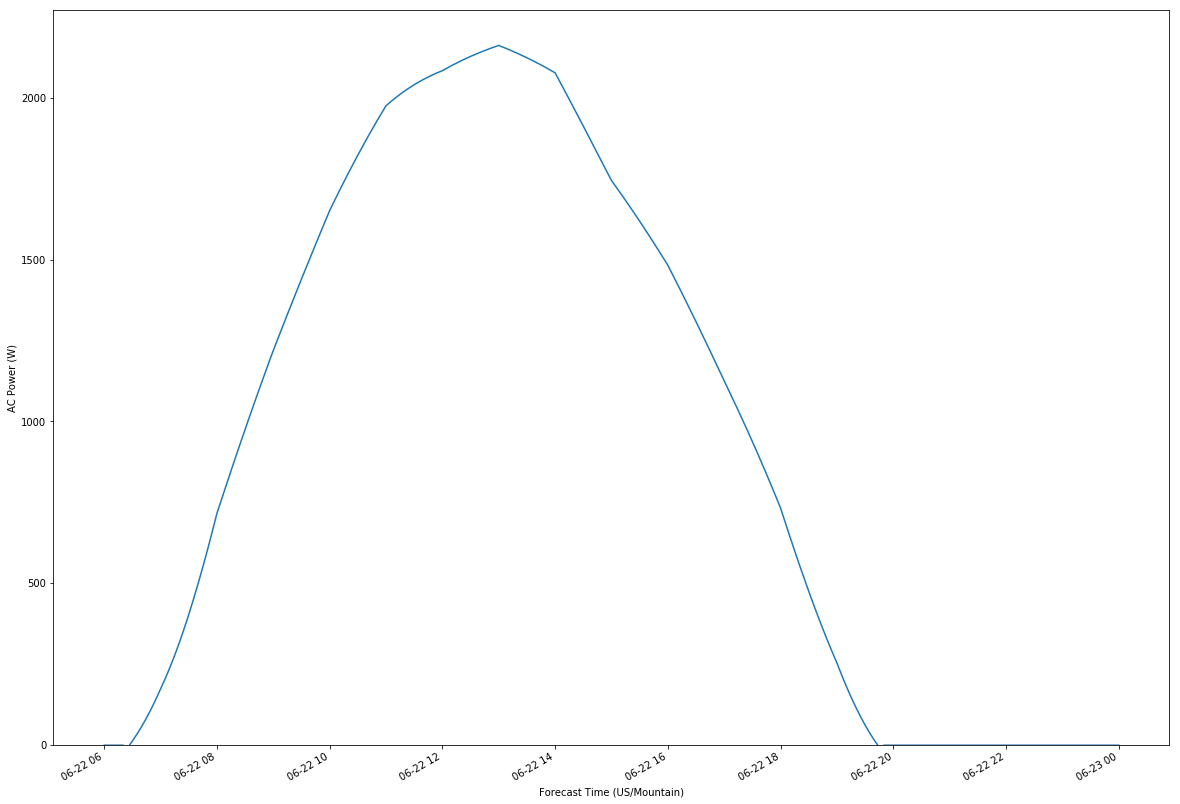

In [37]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [38]:
mc.ac.describe()

count     217.000000
mean      956.583413
std       828.487434
min        -9.262681
25%        -1.560000
50%       937.373433
75%      1772.539499
max      2162.006689
dtype: float64

In [39]:
mc.ac.fillna(0).to_csv('NDFD AC June 22.csv', encoding='utf-8')

### NDFD Irradiance Data

In [40]:
ndfd_data

,ghi,dni,dhi
2020-06-22 06:00:00-06:00,0.278680,0.000000,0.278680
2020-06-22 07:00:00-06:00,107.616939,195.387612,68.535786
2020-06-22 08:00:00-06:00,295.130652,444.027001,119.587086
2020-06-22 09:00:00-06:00,463.047520,456.669142,198.511116
2020-06-22 10:00:00-06:00,622.693710,498.105933,254.456642
2020-06-22 11:00:00-06:00,748.458985,485.491094,328.778622
2020-06-22 12:00:00-06:00,800.557184,428.740090,394.859504
2020-06-22 13:00:00-06:00,832.523324,422.970379,418.379947
2020-06-22 14:00:00-06:00,814.726368,426.330689,405.094907
2020-06-22 15:00:00-06:00,685.992301,300.178760,418.052734


In [41]:
hrrr_data.to_csv('NDFD June 22.csv', encoding='utf-8')